
#**480 L/s Plant Layout and Horizontal Flocculator Design**

### December 18, 2019

### Team Hydro Homies
* Ian Cullings (idc25@cornell.edu) 
* Katie Bradford (keb278@cornell.edu) 
* Valentina Dai (ld466@cornell.edu)

In [0]:
#importing default libraries 
!pip install aguaclara
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import math
import matplotlib.pyplot as plt

##**Introduction**


---




As AguaClara continues to grow and build more water treatment plants worldwide, there will be increasing demand for changes in the typical water treatment train. Building a water treatment plant in each community requires specific changes accounting for both the engineering and operation of the plants in that specific context. In recent months, there have been requests for a series of designs at much larger flow rates, ranging from 240 L/s to 480 L/s. For reference, the largest AguaClara plant built to date is the plant in Gracias with a design flow rate of 120 L/s.

The focus of this project is to begin the design process for a 480 L/s plant by considering the large scale layout of the plant. This will allow us to develop an initial model which can be shared with designers and stakeholders, as well as brainstorm solutions for major problems which will need to be addressed in further research and design projects.  In working on this design, we will be considering not only the design for 480 L/s, but also the general design process for scaling an AguaClara plant beyond 120 L/s.  Desired outputs from this project include both a technical drawing of the plant at 480 L/s and a general design algorithm for building large AguaClara plants.

Other teams from the CEE 4520 class will be working on scaling different unit processes within the water treatment train to larger flow rates, including a high flow Chemical Dosing System, Entrance Tank, and combined sedimentation basins.  Data and designs from these teams will be used to improve the design and form a basis for the full hydraulic design.

However, one important project that is not being undertaken in CEE 4520 this semester is updating the flocculator to handle larger flow rates. This involves changing the flow pattern through the flocculator from vertical flow to horizontal, and designing a new algorithm for design based on flow rate. As this piece is crucial for full design of larger flow rate plants, we will begin the design process for this system as well, and make a general algorithm, similar to that for the vertical flocculator, to design each component.
 


## **General Problem Solving Plan** 

* **Determine approximate parameters of known components**




>We will have to find existing entrance tank designs, CDCs,  flocculators, sedimentation tanks, and filters, some being designed by other teams and some existing in the aguaclara database of designs.  We will need to determine approximate sizes of these components as well as their max flow rates such that we can determine the appropriate number of each component, operated in parallel. 

* **Design updated horizontal flocculator**



>As mentioned, we will have to design an appropriately dimensioned horizontal flocculator for a higher flow rate. This will require similar steps to those previously done on our preliminary exam, deciding baffle number and spacing, width and length of the flow track, and general orientation.  The governing equation for the transition is: 

$$Q = W_{Min}S_{Min} \left( \frac{2 H_e  g^2 h_e^2}{K(G\theta)^2 \nu} \right)^\frac{1}{3}$$
* **Determine connections for each component**

>After we have specified dimensions and number of each component, we will have to decide the most efficient way to connect them together. Each step should have the ability to adjust, drain, and shut off access for maintenance.  An ideal design will allow full control of flow paths through each section of the plant, allowing operators to divert flows between parallel components as necessary.  Given the high flow rate, we will likely have to parallelize the flow paths as well, because no ordinary singular pipe could handle that high of a flow rate. 

* **Design general layout**

>Once we have decided all the components and how they will be connected, we will map out where each component will go. Important things to keep in mind include ease of access for daily use of operators and maintenance access. We have to make sure that a given operator is not constantly running around adjusting things in different places, and that if any given section needs to be shut off, an operator can easily shut down the desired section and perform maintenance.  



##**Design Constraints and Tradeoffs**

As of now, the highest volume plant design from Agua Clara has been 120 L/s in Gracias, and even there there have been some issues with the entrance tank. Creating a 4x higher volume capacity plant will be quite the challenge. Below are several of the main things to keep in mind during this design:
* **Operator Daily and Maintenance Access/human-scaled**

>Due to so many moving parts operating at once, we need to heavily
weigh the difficulty an operator will have maintaining this plant.  We will also need to develop each component so that human operators can easily access each part to perform maintenance and testing comfortably. 

* **Cost/Space**

>The most tangible difficulty with a design of this scale is the space it will take up and the costs of materials, space,  and labor. As full material costs will be difficult to estimate, we will use the plan view area of the plant as an estimate, and work to minimize this constraint.

* **Accessibility VS Efficiency**

>A major tradeoff we have to consider is accessibility vs efficiency. We want to make sure sections can be shut off for maintenance, and humans can easily access any given part of the plant, but we don’t want to sacrifice the ideal layout to achieve this. 

* **Existing Parts VS Redesign**

>We cannot completely reinvent every portion of the plant to allow for 480 L/s flow. Some parts we will attempt to redesign, such as the horizontal flow flocculator. Others we will have to simply parallelize smaller components in the multiple required to reach the total flow. It would be time consuming and unwise to abandon existing technology, but we should also improve as much as possible to not use too many components. 



## **Entrance Tank Design Considerations**

A major constraint given to AguaClara from Agua Para el Pueblo, our partner organization which carries out many of the layout and construction work of the plants built in Honduras, is to have a maximum of two Chemical Dose Controllers, and thus two entrance tanks (APP, 2019).  This is to simplify plant maintenance for the operators, so that they can make changes to chemical dosings without needing to change many sections at once, and allowing them to check plant operation from one location to ensure there are no large problems.

For a 480 L/s plant, this requires two 240 L/s entrance tanks, which would be significantly larger than any ever designed before.  This design is being carried out by another group in the CEE 4520 this semester (cite when completed).  As we await the specifics of this design, we continue with the assumption that this system is designed and leave it variable in our final design.  



##**Horizontal Flow Flocculator Design**
In order to accomodate larger flow rate, using horizontal flow flocculator is a more efficient solution due to the fact that in larger flow rate plants, vertical flow floccualtors may have wider widths than their depths. In addition, vertical flow floccualtors are difficult to drain and clean.

We determined the minimum flow rate for a horizontal flocculator from the procedure in *flocculator design challenge*, considering the constraint that the minimum baffle spacing must be larger than average human width, 45 cm. 

$$Q = W_{Min}S_{Min} \left( \frac{2 H_e  g^2 h_e^2}{K(G\theta)^2 \nu} \right)^\frac{1}{3}$$

In [0]:
K         = 2.56
Ratio_H_S = 3
h_L       = 40*u.cm
H_Min     = 2*u.m
Gtheta    = 3.7e4
T_Des     = 15 * u.degC
nu        = ac.viscosity_kinematic(T_Des)
W_Min     = 2*u.m
S_Min     = 0.5 * u.m
H_Min     = Ratio_H_S*S_Min
Q         = (W_Min * S_Min * ((2*H_Min*(u.gravity**2)*h_L**2)/(K*Gtheta**2 * nu))**(1/3)).to(u.L/u.s)
print('The minimum flow rate for a horizontal flow flocculator is',Q)


The minimum flow rate for a horizontal flow flocculator is 226.3 liter / second


As seen in the above equations, the minimum flow rate for the given parameters is 226.3 L/s. Given that many of our designs center around splitting the flow path into two major sections, giving a flow rate of 240 L/s per flow path, it is ideal to use the horizontal flow flocculator in this situation. 


In [0]:
#Constant Assumptions
ent_l = 1.5*u.m
end_water_depth = 2.0 * u.m
l_max = 6.0 * u.m
chan_l = 6 *u.m
max_Ratio_H_S = 6

**Vertical Flow Flocculator 480L/s**

In [0]:
polycarb_sheet_w = (42*u.inch).to(u.m)
end_water_depth = 2*u.m
vel_grad_avg = ((ac.gravity * h_L) / (nu * Gtheta)).to(u.s ** -1)
retention_time = (Gtheta / vel_grad_avg).to(u.s)
vol = (Q * retention_time).to(u.m ** 3)
chan_n = math. ceil((
                (vol /
                 (polycarb_sheet_w * end_water_depth)
                 ) + ent_l) / chan_l)
Width_total = vol/(end_water_depth* chan_l)

#chan_n
chan_w_min = vol / (
            end_water_depth * (chan_n * chan_l - ent_l))

chan_n = math.ceil(Width_total/chan_w_min)
print('Channel number required is', chan_n)

channel_depth_min = 1.5*u.m
expansion_h_max = (((K /(2 * nu *(vel_grad_avg ** 2))) *
                    (Q* max_Ratio_H_S / chan_w_min) ** 3) ** (1/4)
            ).to(u.m)
expansion_n = np.ceil(end_water_depth/expansion_h_max)
expansion_h = (end_water_depth/expansion_n)
print('Channel depth is', expansion_h)
baffle_s = ((K /((2 * expansion_h * (vel_grad_avg ** 2) *
                  nu)).to_base_units()
                ) ** (1/3) * Q / chan_w_min).to(u.cm)
baffle_n_vertical = round(((chan_l.to(u.cm)) * CHAN_N_MIN) / baffle_s).magnitude
print('Baffle spacing is', baffle_s)
print('Baffle number needed is', baffle_n_vertical)
print('Total channel width for 480L/s flocculator is', vol/(chan_l*expansion_h))

Channel number required is 8
Channel depth is 2 meter
Baffle spacing is 94.11 centimeter
Baffle number needed is 13.0
Total channel width for 480L/s flocculator is 7.482 meter


**Horizontal Flocculator**

We began our design using the following assumptions and using the general design algorithm for flocculation (AguaClara Textbook, 2019).  The code below summarizes the design values for each component of the flocculator at 240 and 480 L/s.  

* $ 3<H{e}/S<6 $
* $ Nobstacles = 0 $
* $ H{e} = H$
*   current standards in AguaClara flocculators:  $ h_l{floc}=40cm , G_{cs}θ=37,000$
*   $N{channels}=W{total}/W{Min}$








In [0]:
#Q = 480L/s
#assume depth of flocculator 
channel_depth = 2*u.m
vel_grad_avg = ((ac.gravity * h_L) / (nu * Gtheta)).to(u.s ** -1)
retention_time = (Gtheta / vel_grad_avg).to(u.s)
vol = (Q * retention_time).to(u.m ** 3)
print('The channel length is', chan_l)
print('Minimum horizontal horizontal flocculator channel width is', min_H_horizontal_channel_width)
expansion_h = 2*u.m 
print('The channel depth from current standards is', expansion_h)

#chan_w
min_spacing = 0.5*u.m
min_H_horizontal_channel_width = (min_spacing * Ratio_H_S).to(u.m)

Width_total = vol/(channel_depth* chan_l)
print('480L/s, total channel width is', Width_total)

#maxl_chan_l
l_max_vol = vol / (CHAN_N_MIN * min_H_horizontal_channel_width * channel_depth)
print('480L/s, the maximum channel length by volume is', l_max_vol)


#chan_n
number = math.ceil(Width_total/min_H_horizontal_channel_width)
print('480L/s, the maximum channel number is',number)

#baffle spacing
baffle_s = ((K /((2 * min_H_horizontal_channel_width * (vel_grad_avg ** 2) *
                  ac.viscosity_kinematic(T_Des))).to_base_units()
                ) ** (1/3) * Q / channel_depth).to(u.cm)
print('480L/s,the baffle spacing is', baffle_s)

CHAN_N_MIN = 2
baffle_n = round(((chan_l.to(u.cm)) * CHAN_N_MIN) / baffle_s).magnitude
print('480L/s,the baffle numbers are', baffle_n)

#Q = 240L/s
channel_depth = 2*u.m
vol_240 = vol = (Q2 * retention_time).to(u.m ** 3)

l_max_vol_240 = vol_240 / (CHAN_N_MIN * min_H_horizontal_channel_width * channel_depth)
print('240L/s, the maximum channel length by volume is', l_max_vol_240)

width2total = vol_240/(channel_depth*chan_l)
print('240L/s, the total channel width is', width2total)
number = math.ceil(width2total/min_H_horizontal_channel_width)
print('240L/s, the maximum channel number is', number)
baffle_s_240 = ((K /((2 * min_H_horizontal_channel_width * (vel_grad_avg ** 2) *
                  ac.viscosity_kinematic(T_Des))).to_base_units()
                ) ** (1/3) * Q2 / channel_depth).to(u.cm)
print('240L/s, The baffle spacing is', baffle_s_240)
baffle_n_240 = round(((chan_l.to(u.cm)) * CHAN_N_MIN) / baffle_s_240).magnitude
print('240L/s, The baffle number is', baffle_n_240)

The channel length is 6 meter
Minimum horizontal horizontal flocculator channel width is 1.5 meter
The channel depth from current standards is 2 meter
480L/s, total channel width is 7.482 meter
480L/s, the maximum channel length by volume is 14.96 meter
480L/s, the maximum channel number is 5
480L/s,the baffle spacing is 50 centimeter
480L/s,the baffle numbers are 24.0
240L/s, the maximum channel length by volume is 15.87 meter
240L/s, the total channel width is 7.936 meter
240L/s, the maximum channel number is 6
240L/s, The baffle spacing is 53.03 centimeter
240L/s, The baffle number is 23.0


|Parameters  |240L/s   |480L/s| 
|---|---|---|
|Optimal Channel Depth| 200 cm| 200 cm|
|Channel Length|600 cm |600 cm  |
|Maximum Channel Length| 997.6 cm| 1058 cm|
|Total Channel Width| 793.6 cm| 748.2 cm|
|Minimum Channel Width  |150 cm |150 cm   |
|Maximum Channel Number  |6 |5 |
|Baffle Spacing  |53.03 cm  |50 cm | 
|Baffle Number | 23 |  24 |
|Minumum Flow Rate|226.3 L/s |226.3 L/s | 

<center>

**Table 1: Design Values for 240 and 480 L/s horizontal flocculators**
</center>


* **Assumptions choice**


We aim to design a horizontal flow flocculator for 240 L/s and 480 L/s, based on the two options for flow paths we had determined. The calculations are much the same as that of a vertical flow flocculator but switching the values for height and width. With a horizontal flow flocculator, there is no need for extra obstacles on top of the baffles already present. Therefore, expansion height = channel depth.
<center>
$vertical H--> HorizontalW$
</center>

We chose 2m as the height of the horizontal flow flocculator based on the height of the sedimentation tanks, so as not to create a major head difference. H/S = 3, currently used in Agua Clara plant, ensures that flow does not short-circuit through flocculator and allows more space for flow expansions after each contraction. However, while H/S = 3 is the optimal value, the range of H/S is from 3-6. Therefore, increasing H/S value, increasing the minimum unit channel width, we can decrease the use of the number of channels.
<center>
$ 3<H/S<6 $
</center>


Using the calculations based on the flocculation assignment earlier in the semester (Monroe, Flocculation), we found the 240 L/s and 480 L/s flocculation tanks to be very similar, with the 240 L/s flocculator requiring one extra channel than the 480 L/s version. Both the 240 L/s and 480 L/s versions required a length of 600 cm and a width of 150-200 cm. The 240 L/s had 6 channels and 23 baffles, and the 480 L/s version had 5 channels and 24 baffles. 

<center>
$ Length = 600 cm$

$ ChannelUnit Width 150 cm$

$Spacing≈50cm$




<p style="text-align: center;">
<img src="https://github.com/kebradford/HydroHomies/blob/master/240_floc.png?raw=true" height = 200 />
 </p>

**Figure 1: Module for the layout of the horizontal flocculator**

</center>



* **Disscussion**

In fact, after going through the comparison between the calculations for 480 L/s horizontal and vertical flocculator, it is found that the final layouts are the same since we are assuming the channel length to be 6 m, channel depth to be the same as sedimentation tank and the total width is calculated from the volume. Although vertical flocculators require less baffles than horizontal flocculators, vertical flocculators require close to twice as many channels than that in horizontal flocculators, which reuqires more concrete and more cost.
**Final layout for 480 L/s flocculators would be the same for vertical and horizontal flocculators design but vertical flow flocculators require close to twice as many channels as that in horizontal flow flocculators**

##**Mainfold Design**
While the design of most unit processes will not be changed significantly in the shift to 480 L/s, with larger flowrates the transport of water between each section will be a critical design component.  As each section is designed with a specific operating flow rate, it is crucial to split flow evenly between each unit process for optimal treatment efficiency.  This problem is further complicated with higher flow rates, which require wider and deeper channels to reduce flow velocities.  The tradeoff between channel size and flow distribution efficiency will need to be balanced to reduce costs while maintaining even flows.



In the case of the 480 L/s plant, the mainfold design is changed slightly as there are two connected channels between inlet from from the flocculator and the exit of the sedimentation tank.  The second channel then connects to the inlet of each of the sedimentation tanks in each sedimentor and continues.  Since this is one connected system, without any weirs or drops, headloss, the main driver of mainfold distribution, is set by both flow through the sedimentation tank, and through the channels.  We assume in this analysis that headloss through the channels is negligible in comparison to the sed tank.

Thus, headloss through the sendimentation tanks is what drives even flow distribution and will be our key design variable.  Headloss through the outlet mainfold in the sedimentation tank is the main headloss in the system, so we focus on that.  Thus, we take the mainfold equation:
<center>

$ \frac{\bar v_{P}}{\bar v_{M}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}} $
</center>


In this case, $ \bar v_{P} $ is the port velocity through the effluent mainfold (after it is contracted by vena contracta) and $ \bar v_{M_1} $ is the velocity through the first manifold channel.  Thus, for a given design $ \Pi_{Q} $ we can design to achieve the ratio of these velocities $ \frac{\bar v_{P}}{\bar v_{M}} $ required.  

However, another complication of this design is that there are mainfolds in series.  In each design the main influent channel connects to smaller channels for each sedimentor which then feed into each individual sedimentation tank.  Since the flow transition from each of these channels is not perfect, we must further account for these ratios as well.  The new equation, derived in the mainfolds section of the notes, is below (Manifolds, 2019).
<center>
$ \frac{\bar v_{P}}{\bar v_{M}} = \sqrt{\frac{m(\Pi_{Q}^2 + 1)}{2(1 - \Pi_{Q}^2)}} $
</center>

In this equation m represents the number of mainfolds connected in series, which for our design is 2. 

While the velocities between each channel may be differnet due to differing flow rates and dimensions, we make the simplifying assumption that they are similar enough that they can be treated as the same, which allows this equation to hold for this design (as otherwise $ \bar v_{M} $ would shift between each part).

This puts forth another interesting design question, as we have the option to change both $ \bar v_{P} $ and $ \bar v_{M} $ to get the required value.  Changing $ \bar v_{P} $ is much simpler to achieve, as this is set by the total headloss through the sed tank.  Since 
all of the velocity is lost when going through the orifice, and velocity through the orifice is given as:
<center>
$ v_{constricted} = \sqrt{2gh_l} $
</center>

So total headloss through the mainfold is:
<center>
$ h_l = \frac{v_{constricted}^2 }{2g} $
</center>

And in this case $v_{constricted} = \bar v_{P} $.  So as we increase the port velocity and thus the headloss, we can then increase the maximum manifold velocity while maintaining the same level of flow distribution.  

This poses an interesting economic tradeoff, as increasing headloss theough the sed tanks increases the depth of the tank, and thus the total height of the plant.  In typical plants we do not expect this to be a significant cost (it would equate to 1-2 extra layers of bricks during construction), but in cases where water is pumped, this could pose a serious cost over the lifetime of a plant.  

On the other hand, keeping $ \bar v_{P} $ and thus $ \bar v_{M} $ low requires large inlet channels for distribution.  These are more costly, both in construction and in increasing the overall plan-view area of the plant, and is they are too large can affect accesibility of the plant for repairs.  Thus, we will generally try to maximize headloss over channel width in design.

This gives us a few parameters to design around: $ \Pi_{Q} $, a measure of how well flow is distributed, $ \bar v_{P} $ which set the headloss through the sed tank, and $ \bar v_{M} $, which sets channel dimensions.  We experiment with different options in the code below.


Text(0.5, 1.0, 'Headloss effects on mainfold velocity for $ \\Pi_{Q} = 0.85, m = 2 $')

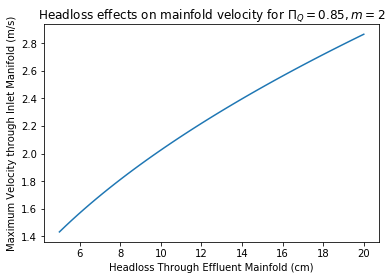

In [0]:
piQ = 0.85 #can adjust for desired level of flow distribution (increases costs but increases evenness of flow splitting)
m = 2 #number of channels in series
hl_input = np.linspace(5,20,50) * u.cm
vp_design = np.sqrt(2*ac.gravity*hl_input)
vm_design = (vp_design / (np.sqrt(m*(piQ**2 + 1) / 2*(1-piQ**2)))).to(u.m/u.s)
plt.plot(hl_input, vm_design)
plt.xlabel('Headloss Through Effluent Mainfold (cm)')
plt.ylabel('Maximum Velocity through Inlet Manifold (m/s)')
plt.title('Headloss effects on mainfold velocity for $ \Pi_{Q} = 0.85, m = 2 $')

Text(0.5, 1.0, 'Headloss Effects on Inlet manifold Width for $ \\Pi_{Q} = 0.85, m = 2 $ at 480 L/s')

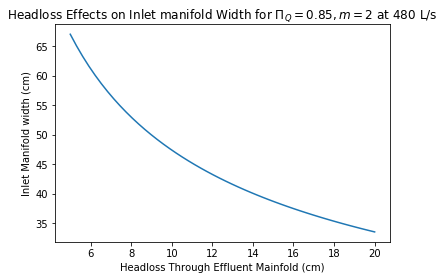

In [0]:
#Assuming max channel depth of 0.5 m 
Q_channel = 480 * u.L / u.s
chan_width = (Q_channel / (vm_design * 0.5*u.m)).to(u.cm)
plt.plot(hl_input, chan_width)
plt.xlabel('Headloss Through Effluent Mainfold (cm)')
plt.ylabel('Inlet Manifold width (cm)')
plt.title('Headloss Effects on Inlet manifold Width for $ \Pi_{Q} = 0.85, m = 2 $ at 480 L/s')

##**Numbers of each Unit Process**##

The following code calculates the number of each unit process component given an input flowrate.  We use the current max flow rates for each component, as summarized below:

|Unit Process   |Max Flowrate   |Design Considerations| 
|---|---|---|
|Entrance Tank / CDC   |240 L/s   |Assumption of design   |
|Flocculator   | 480 L/s +  | See design section for Horizontal Flocculator  |
|Sedimentation Tank   | 6 L/s  | Often combined into groups of 10 to form a "Sedimentor"  | 
|Filter   |20 L/s   |   |


From here we can see the clear constraining unit process is sedimentation tanks, which have the lowest maximum flow rate and take up the most space, as shown in the [plant CAD](https://cad.onshape.com/documents/5a7585ae3248902548b02541/w/349594d2eb30a283f019807e/e/add8912cf760c28f462bd04f).  Thus, future design work should focus on designing a more efficient sedimentation tank, as this is the limiting factor as flow rates increase greatly.


In [0]:
def Unit_nums(Q):
  num_et = math.ceil(Q / (240 * u.L/u.s))
  num_sed_tanks = math.ceil(Q / (6 * u.L/u.s))
  num_sediment = math.ceil(Q / (60 * u.L/u.s))
  num_filt = math.ceil(Q / (20 * u.L/u.s))
  print("The number of entrance tanks needed for the design is", num_et)
  print("The number of sedimentation tanks needed for the design is", num_sed_tanks)
  print("The number of sedimentors needed for the design is", num_sediment)
  print("The number of filters needed for the design is", num_filt)

In [0]:
#Run for 480 L/s design 
Unit_nums(480*u.L/u.s)

The number of entrance tanks needed for the design is 2
The number of sedimentation tanks needed for the design is 80
The number of sedimentors needed for the design is 8
The number of filters needed for the design is 24


##**Design Options**

###***Design One***





<center>
<p style="text-align: center;">
<img src="https://github.com/kebradford/HydroHomies/blob/master/Untitled%20Diagram.png?raw=true" height = 250 />
 </p>

**Figure 2: Design one plant layout**

</center>

  



In this design, the water is primarly split into two flow paths until the filters. Each entrance tank and flocculator are 240 L/s, each group of 10 sed tanks makes up a 60 L/s sedimenter in parallel with one another, and the two flow paths combine to reach the filters. 
There are several pros and cons to this design: 

**Advantanges**

*   One half of the flow can be taken offline for cleaning and/or maintenance 
*   The operator can experiment with different chemical dosages, and see which is more effective on a given day. 
*   The channels connecting the different components only need to support a 240 L/s flow rate, instead of a much higher 480 L/s flow rate. 
*   Can use horizontal flocculator designed in flocculator design challenge

**Drawbacks** 


*   The flow path is not truly entirely separate, because the filters are all connected, but the operator can still roughly see which half water is coming from and make the decision based on that
*   This is not too different from just building 2 separate 240 L/s plants

*   It is more expensive to build two smaller paths as opposed to one larger path










### ***Design Two***


<center>
<p style="text-align: center;">
<img src="https://github.com/kebradford/HydroHomies/blob/master/480L_s.png?raw=true" height = 400 />
 </p>

**Figure 2: Design two plant layout**
</center>

Another option is to run all flow through a horizontal flocculator at 480 L/s and split the outflow into each set of sedimentation tanks.
This design runs all flow through one main manifold, then splits the design off into sections into each sedimentor, where flow then reconnects into a final filtration section through outlet channels.  Below each sedimentor the channels would have a drainage system which would connect to a central waste drain.  Some advantages and disadvantages include:

**Advantages**
* Running all flow through a single flocculator and mainfold reduce space needed and material costs.
* Design creates simple straight flow path with many points of access for testing and maintenence.
* Ease of operation: parallel entrance tanks easily allow operators to check dosing rates and control flow from one central location.


**Drawbacks**
* Maintenance is more difficult with one flow path, entire plant would need to be shut down to change sections of flocculator.
* Channels will need to be designed very large to maintain safe velocities, increasing costs and making access more challenging.
* With the straight mainfold design there would be a buildup of flow at the end.  This could lead to floc desposition if velocities got too low (below 0.15 m/s).  Geometry would need to be changed, or a drain installed there to prevent constant floc desposition.  
* Collisions at the end of this mainfold could also cause floc breakup if the stop is to sudden.  Thus, channel width should increase, or velocities should be kept low enough to provide a gradual decrease in velocity.
*  Given that the flow path is the same for all the water, the operator does not have to opportunity to test different chemical dosings to see what is more effective for the turbidity at a given time

### ***Design Three***
This design is similar to the second, with one main flocculator and mainfold to carry the full water flow.  However, sedimentors and filters are further divided into separate treatment trains, with each being a closed sedimentation and filtration process.  Another possible design consideration for this would be adding an extra sedimentor / filter section, so that full treatment could continue while one entire section was taken offline for backwash or repairs.
<center>
<p style="text-align: center;">
<img src="https://github.com/kebradford/HydroHomies/blob/master/Untitled%20Diagram%20(1).png?raw=true" height = 300 />
 </p>

**Figure 3: Design three plant layout**
</center>


**Advantages**
* Offers even more flexibility with flow distribtion, entire sections could be taken offline for repairs and maintenance without disrupting flow capacity.
* Offers more flexibilty with testing and optimizations, changes could be made to one sedimentor section and compared to others as all use the influent from the same floculator.
* Sedimentation waste management would be easier than in other designs, all sed tanks could exit to one main channel below and be disposed of easily.

**Drawbacks**
* Less efficient use of space: each sedimentor + filter uses more space, splitting filters increases material costs
* Flow splitting from mainfold to sed tanks would be difficult, as designed much more water would flow into middle sed tanks than outer ones.  Would likely need a more gradual inlet to spread flow out and slow it down, and headloss through sedimentation tanks manifolds would need to be increased to divide flow more evenly, increasing construction costs.
* Access to sedimentors would be difficult in case of repairs, likely would need small bridges over flow channels to allow operators to get in, increasing costs and complexity.


##**Conclusions and Reflections**##
In order to decide between the three designs we envisioned for this plant, we created a weighted consideration of design decisions. 

1. The primary pain point for this water treatment facility will be size, so that will be taken into account as the most heavily weighted factor. A design with one treatment train is far smaller than creating dual paths. 
2. 
The next most important thing is the ability for the operator to manuever and use the plant, so the plant does not need to employee too many operators and they are not struggling to keep up with demand. One treatment train also assists with this, as well as having a single CDC control station, whether that exists between the two treatment trains or just controlling the single train. 

3. The ability for operators to perform maintenance tasks is crucial to the long term success of the plant. Early on in our design thinking, we assumed this meant two treatment trains. However, by working through the different unique challenges associated with designing this plant, we have found that the majority of unit processes can still be maintained in an individual way. For instance, a single sed tank can still be taken offline, or a single filter. The primary challenge is the flocculator, which is the only unit process that will take the entire treatment operation down for maintenance. Luckily, flocculator maintenance is not as frequently required as maintenance to the sed tanks and filters, which need to be cleaned out and backwashed respectively. 
4. One thing that is not obvious in our designs or easy to show is drain channels for waste. Sludge from the sedimentors need to be kept separate from dilute waste streams, so we will require at a minimum two paths for waste. Keeping seperate flow paths would require even more channels for waste streams. Ideally for this design consideration, the flocculator would have a drain, the sedimentor would have a seperate drain so that sludge could be managed, and the filters would also have their own drain. 

Based on these considerations in our several designs, we have come to the conclusion that one treatment path will be the optimal treatment plan. We have chosen **Design 2**.

<center>
<p style="text-align: center;">
<img src="https://github.com/kebradford/HydroHomies/blob/master/480L_s.png?raw=true" height = 300 />
 </p>


</center> 



We will assume that the group tackling larger entrance tanks achieves their goal and allows us to use a 480 L/s entrance tank. We will use our horizontal floculator design to account for 480 L/s flow, as calculated above. We will use 8 groups of 10 sed tanks ('sedimentors') arranges in two rows such that an operator can walk down the middle of the rows and keep an eye on all the sed tanks easily. Finally, the flow will break into 24 filters that will each operate individually to finish off treatment of the water. One change we made from our initial drawing of Design 2 was to move the CDC to the other side of the entrance tank to make more efficient use of the space. 

This will allow us the greatest optimization of size as well as operator ease, which we have determined to be the most important factors in this design. The biggest downside to the design is maintenance, but as we discovered, this is only largely a problem for the flocculator, which is not as frequently taken down for maintenance. 





##**Future Work**

This design process shows the difficulty of design, and that much more work will need to be done before a final model can be completed.  First comes with further redesign of unit processes.  At the lower flow rates that AguaClara has designed for previously these designs are sufficient to meet demand at reasonable costs, but as these designs are scaled up we quickly see that these become unreasonable.  In a practical setting plants with 80 sedimentation tanks become unreasonably expensive and difficult to operate and maintain.  Thus, future design work and research should focus on reducing plan view area and increasing flow rates through the sed tanks and filter to provide an economical and efficient design.

Additionally, more focus should be placed new challenges that arrive with a higher flow rate.  Some examples that came up in brainstorming include:
* Entrance tank design: can mixing occur efficiently with increased flow rate?  How will the CDC and LFOM need to be changed?
* Mainfold distribution: are there other ways to design channels and manifolds to balance flow distribution?  Possibilities include sloping the bottom, and changing headloss through the sed takn mainfold.
* Scaling up beyond 480 L/s: How well can these challenges carry through as design continues to scale up?  Can this same algorithm be used for 960 L/s, or beyond?
* At what point is it feasible to design multiple water treatment plants spread across the city instead of one larger plant?  A further economic analysis would be needed.

##**Bibliography** 
AguaClara Team . (2019). AguaClara Plant Onshape Model [CAD Model]

Weber-Shirk, M., Guzman, J., O'Connor, C., Pennock, W., Lion, L., Du, Y., & Maisel, Z. (2019) "*AguaClara Cornell Textbook*"

Weber-Shirk, Monroe. "*Flocculator Design Challenge*" Homework Assignment. Cornell University CEE 4520. Ithaca. October 2019. Code.

Weber-Shirk, Monroe. "*Mainfolds*" Powerpoint Presentation, pgs 1 - 18. Cornell University CEE 4520. Ithaca. October 2019. 

"Agua Para el Pueblo" *Apphonduras* October 2019. https://www.apphonduras.org/
 
Recommended Standards for Water Works. Health Research Inc. , 16 Oct. 2008, www.hes.org

 
